In [1]:
import sys
import os

sys.path.append(os.path.abspath("../.."))

from src.utils.tools import set_global_seed
set_global_seed(13)

from src.synthetic_data.synthetic_data_tools import *
from src.visualization.plots import *

# Short Seasonal Data

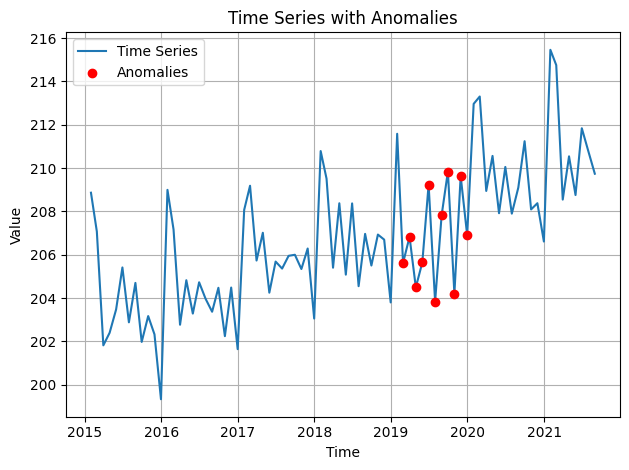

In [ ]:
n = 80

t = np.arange(n)
dates = pd.date_range("2015-01-01", periods=n, freq='ME')

trend = 203 + 0.1 * t  # Linear
seasonality = seasonality_fourier(t, 12)  # Yearly seasonality
arma, _, _ = random_causal_arma(0, 1)  # MA(1)
noise = arma.generate_sample(nsample=n)

ts = trend + seasonality + noise
df = pd.DataFrame({'timestamp': dates, 'value': ts, 'labels': np.zeros(len(ts), dtype=bool)})

inject_noise(df, start=49, end=60, mean=df['value'].mean(), scale=2.5)
plot_data_with_anom(df)

# df.to_csv("../../data/short_seasonal.csv", index=False)

# Physics Oscillator Data

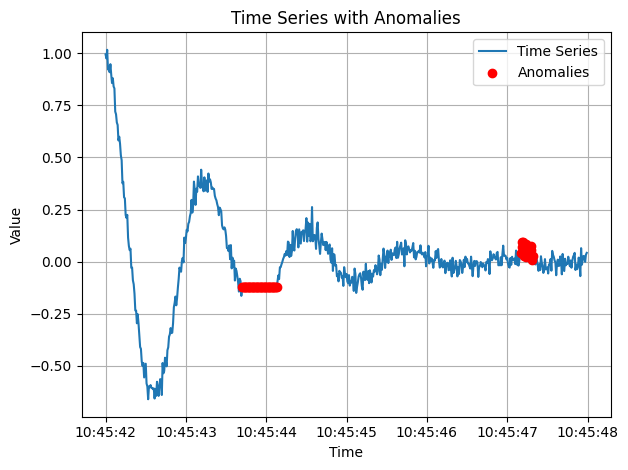

In [ ]:
df = gen_damped_oscillator(
    A=1.0, zeta=0.15, omega=2*np.pi*0.8, phi=0.0,
    dt=0.01, T=6.0, sigma_meas=0.03, start_time="2025-07-23 10:45:42"
)

inject_flat(df, start=170, end=214)
inject_shift(df, start=517, end=533, shift=0.05)

plot_data_with_anom(df)
# df.to_csv("../../data/physics_oscillation.csv", index=False)